In [119]:
import nltk
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
from datetime import date
from pandas import Series

In [285]:
files = pd.read_csv('..\csv\\filenameinfo.csv')
topics = list(files['topic'].unique())
topics.remove('indUnk')

In [286]:
## Used to translate all the months to english
month = {}
month['May'] = 'May'
month['June'] = 'June'
month['July'] = 'July'
month['November'] = 'November'
month['December'] = 'December'
month['January'] = 'January'
month['February'] = 'February'
month['March'] = 'March'
month['April'] = 'April'
month['August'] = 'August'
month['September'] = 'September'
month['October'] = 'October'
month['juillet'] = 'July'
month['mai'] = 'May'
month['juin'] = 'June'
month['agosto'] = 'August'
month['enero'] = 'January'
month['febrero'] = 'February'
month['marzo'] = 'March'
month['abril'] = 'April'
month['mayo'] = 'May'
month['junio'] = 'June'
month['julio'] = 'July'
month['septiembre'] = 'September'
month['octubre'] = 'October'
month['noviembre'] = 'November'
month['diciembre'] = 'December'
month['mars'] = 'March'
month['Junho'] = 'June'
month['Maio'] = 'May'
month['juni'] = 'June'
month['Aprill'] = 'April'
month['september'] = 'September'
month['Julho'] = 'July'
month['ottobre'] = 'October'
month['toukokuu'] = 'May'
month['luglio'] = 'July'
month['janvier'] = 'January'
month['avril'] = 'April'
month['Dezember'] = 'December'
month['Januar'] = 'January'
month['Februar'] = 'February'
month['Mai'] = 'May'
month['Juni'] = 'June'
month['Juli'] = 'July'
month['Agosto'] = 'August'
month['maart'] = 'March'
month['mei'] = 'May'
month['juli'] = 'July'
month['maj'] = 'May'
month['elokuu'] = 'August'
month['augustus'] = 'August'
month['august'] = 'August'
month['augusti'] = 'August'
month['Avgust'] = 'August'
month['Setembro'] = 'September'
month['Outubro'] = 'October'
month['Novembro'] = 'November'
month['Dezembro'] = 'December'
month['Janeiro'] = 'January'
month['Fevereiro'] = 'February'
month['Abril'] = 'April'
month['kolovoz'] = 'August'
month['lipanj'] = 'June'
month['desember'] = 'December'
month['septembre'] = 'September'
month['octobre'] = 'October'
month['novembre'] = 'November'

In [175]:
names = glob.glob('..\Data\*')
info = []
for name in names :
    with open(name, 'r') as f :
        try :
            soup = BeautifulSoup(f,'xml')
        except UnicodeDecodeError :
            continue
    dates = [date.get_text() for date in soup.find_all('date')]
    x = name[:-4].replace('..\\Data\\', '')
    x = x.split('.')
    for date in dates :
        datelist = date.split(',')
        if len(datelist) != 3 :
            continue
        d = {}
        d['day'] = datelist[0]
        d['month'] = month.get(datelist[1],'Unknown')
        d['year'] = datelist[2]
        d['id'] = x[0]
        d['sex'] = x[1]
        d['age'] = int(x[2])
        d['topic'] = x[3]
        info.append(d)

[{'age': 37,
  'day': '31',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '29',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '28',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '28',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '28',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '28',
  'id': '1000331',
  'month': 'May',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '21',
  'id': '1000331',
  'month': 'June',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age': 37,
  'day': '18',
  'id': '1000331',
  'month': 'June',
  'sex': 'female',
  'topic': 'indUnk',
  'year': '2004'},
 {'age

In [176]:
import csv
with open('Dates.csv', 'w', newline='') as f :
    writer = csv.DictWriter(f, fieldnames=['id', 'day','month','year', 'age', 'sex', 'topic'])
    writer.writeheader()
    for x in info :
        writer.writerow(x)

In [287]:
df = pd.read_csv('Dates.csv')
df.head()


,id,day,month,year,age,sex,topic
0,1000331,31.0,May,2004.0,37,female,indUnk
1,1000331,29.0,May,2004.0,37,female,indUnk
2,1000331,28.0,May,2004.0,37,female,indUnk
3,1000331,28.0,May,2004.0,37,female,indUnk
4,1000331,28.0,May,2004.0,37,female,indUnk


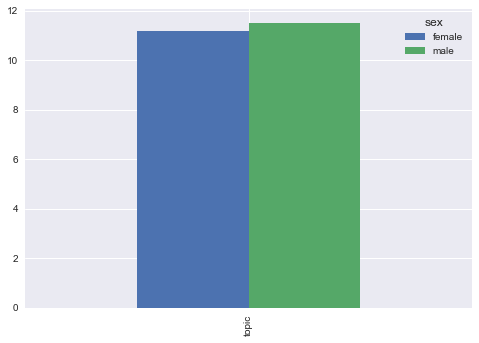

In [288]:
month_count = df[['id','month','year','sex','topic']].groupby(['year','month','id','sex']).count().reindex()
month_count.unstack().mean().reindex().unstack().plot(kind='bar')
plt.show()

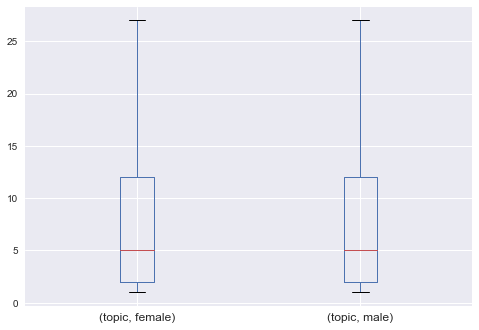

In [289]:
month_count = df[['id','month','year','sex','topic']].groupby(['year','month','id','sex']).count().reindex()
month_count = month_count.unstack().reindex()
month_count.boxplot(showfliers=False)
plt.show()

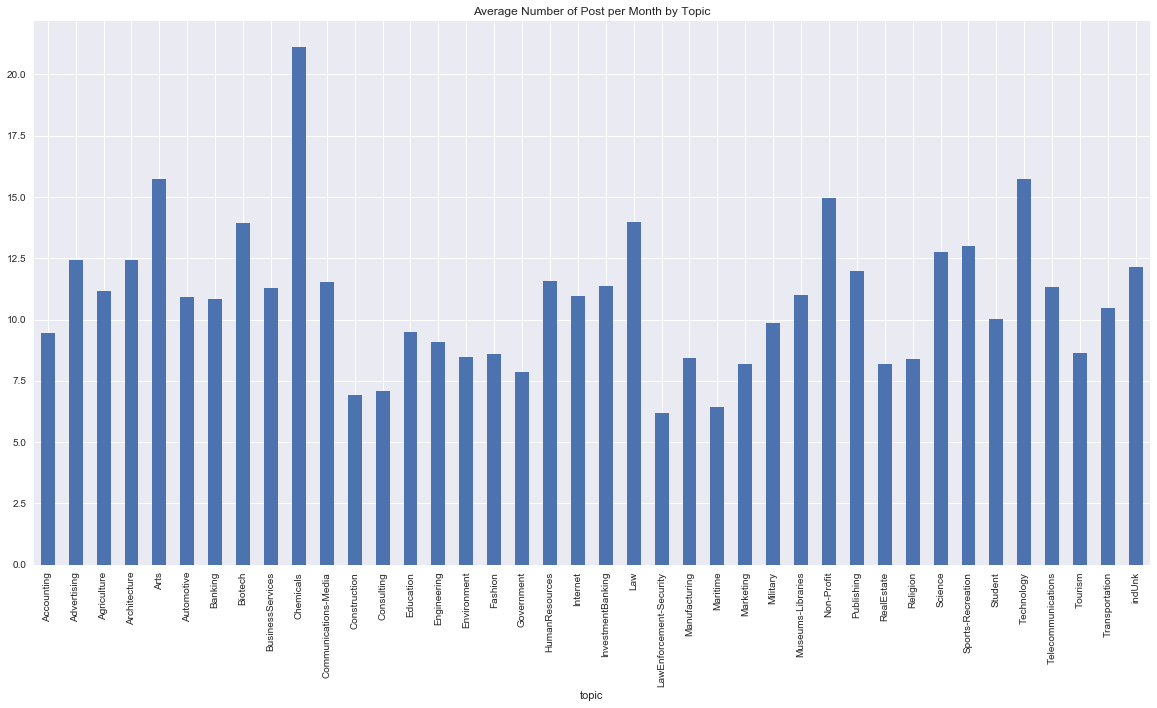

In [294]:
month_count = df[['id','month','year','sex','topic']].groupby(['year','month','topic','id']).count().reindex()
month_count = month_count.unstack().unstack().reindex()
avg_posts = month_count.mean().unstack().reindex()
avg_posts.mean().plot(kind='bar', figsize=(20,10), title="Average Number of Post per Month by Topic")
plt.show()

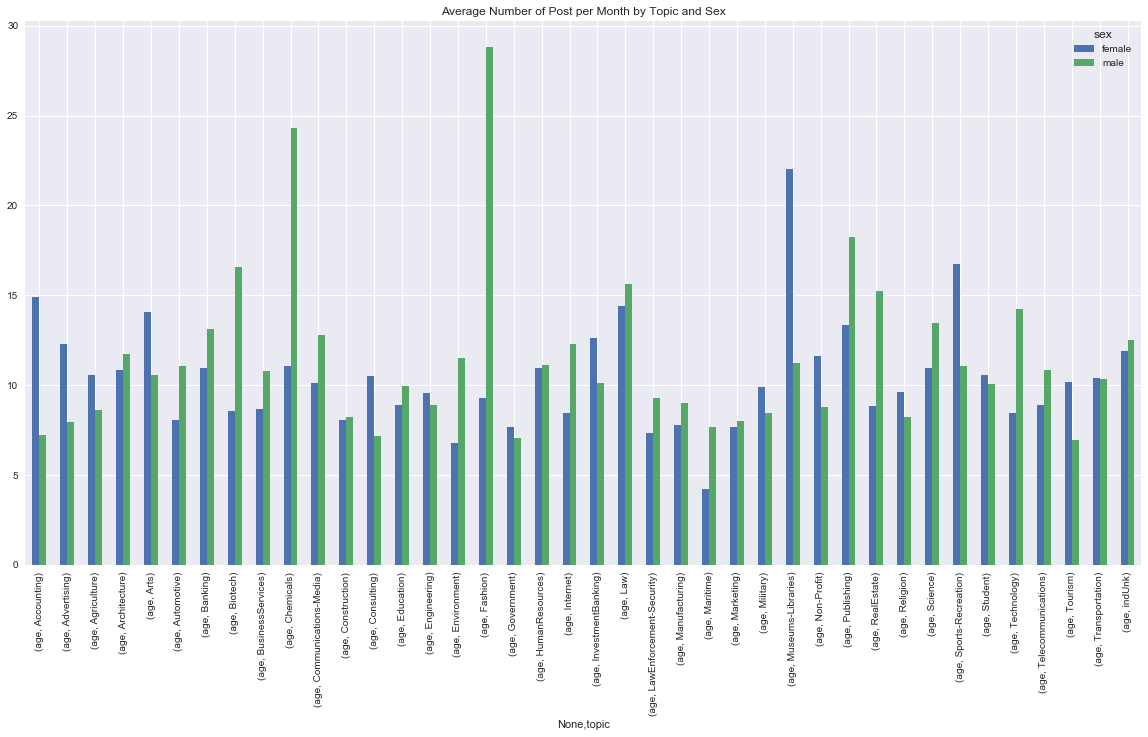

In [295]:
month_count = df[['id','month','year','sex','topic','age']].groupby(['month','year','id','sex','topic']).count().reindex()
month_count = month_count.unstack().unstack().reindex()
avg_sex_topic = month_count.mean().unstack().reindex()
avg_sex_topic.plot(kind='bar',figsize=(20,10),title="Average Number of Post per Month by Topic and Sex")
plt.show()